In [1]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, KFold

In [2]:

# df_TagDesc = pd.read_csv(r'C:\Users\saust\OneDrive\Desktop\GitRepo\Project-OptiC4\CSV\Not for Processing\TagDesc.csv')

# df_All_1 = pd.read_csv(r'C:\Users\saust\OneDrive\Desktop\GitRepo\Project-OptiC4\1 Preprocess\Merge Data\contData_all_Avg_1o2.csv')
# df_All_2 = pd.read_csv(r'C:\Users\saust\OneDrive\Desktop\GitRepo\Project-OptiC4\1 Preprocess\Merge Data\contData_all_Avg_2o2.csv')
# # Concatenate (union) the dataframes
# df_All = pd.concat([df_All_1, df_All_2], ignore_index=True)

df_All = pd.read_csv(r'C:\Users\austinsh\Project-OptiC4\III Models\3 Model C4\3 Feature Selection\filtered-out_5-9_corr.csv')

print(df_All.head())


                  Date  425_pct_Al     Al2O3  M_Value  C4_pct_Eth  C4_pct_H2O  \
0  2012-05-17 09:00:00    6.319560  11.41670  3.50773    2.554580     22.0531   
1  2012-05-17 10:00:00    6.319915  11.40835  3.50797    2.555935     22.0557   
2  2012-05-17 12:00:00    6.320970  11.39165  3.50869    2.560005     22.0636   
3  2012-05-18 08:00:00    6.328690  11.39165  3.51401    2.540370     22.0604   
4  2012-05-18 09:00:00    6.336060  11.40500  3.51910    2.514430     22.0484   

   HydWtr_pct_Ammonia  C4_pct_Hex  HydWtr_Na2O  Butanol  ...   LC55568  \
0            0.867508    0.670721     3.354160  30.3662  ...  40.25250   
1            0.864729    0.671059     3.306475  30.3662  ...  40.25250   
2            0.856391    0.672071     3.163420  30.6785  ...  40.25250   
3            0.811652    0.674174     2.238130  32.6454  ...  39.88364   
4            0.773793    0.675408     1.391475  32.6454  ...  39.88364   

     LC90366   LC90368   PI55004   PI55020   TC55552   TC55553   TC5

### Include

In [3]:
# selected_columns = ['Butanol', 
#                     'FC55569',
#                     'DI55152',
#                     '425 %Al',
#                     'TC55552',
#                     'FC55003',
#                     'LC55555',
#                     'FFC55553',
#                     'FFC55555',
#                     'TC55555',
#                     'TI55021',
#                     'PI55004',
#                     'FC55552'
#                     ]
# existing_columns = [col for col in selected_columns if col in df_All.columns]
# df_All = df_All[existing_columns]

# print(df_All.head())

In [4]:
# Set max columns to display
pd.set_option('display.max_columns', None)

### Exlcude

In [5]:
# List of columns to exclude to run XGboost feature selection
exclude_columns = ['Date', 
                
                     # First Pass
                    'Al2O3',
                    'M_Value',
                    'LC52572',
                    'TC55553',
                    'DI55580',
                    'PI55004',
                    'TI55021',
                    'LC55568',
                    'TI40050',
                    'PI55020',
                    
                    # Second Pass
                    'TC55555',
                    'LC55553',

                    # Third Pass
                    'FC55003'

                   ]

# Create a new DataFrame without the excluded columnsd
df_All = df_All.drop(columns=exclude_columns)

In [6]:
df_All.columns

Index(['425_pct_Al', 'C4_pct_Eth', 'C4_pct_H2O', 'HydWtr_pct_Ammonia',
       'C4_pct_Hex', 'HydWtr_Na2O', 'Butanol', 'DI55102', 'DI55152', 'FC55552',
       'FC55569', 'FC55576', 'FFC55553', 'FFC55555', 'LC55557', 'LC90366',
       'LC90368', 'TC55552'],
      dtype='object')

In [7]:
# df_All = df_All[df_All['Date'] > '2020-06-15 00:00:00']

In [8]:
# df_All.drop('Date', axis=1, inplace=True)

In [9]:
print(df_All.describe())

         425_pct_Al    C4_pct_Eth    C4_pct_H2O  HydWtr_pct_Ammonia  \
count  40127.000000  40127.000000  40127.000000        40127.000000   
mean       6.133716      1.213887     21.178645            0.967938   
std        0.228800      0.691779      2.750323            0.146452   
min        5.270185      0.030786      7.714985            0.374388   
25%        6.003510      0.621701     18.843125            0.877260   
50%        6.135865      1.103350     21.462900            0.939660   
75%        6.265830      1.687807     23.275925            1.028358   
max        7.026215      9.466675     34.151950            1.615295   

         C4_pct_Hex   HydWtr_Na2O       Butanol       DI55102       DI55152  \
count  40127.000000  40127.000000  40127.000000  40127.000000  40127.000000   
mean       0.471411      0.789919      9.218873      0.944657      0.932500   
std        0.241196      0.686560      8.828021      0.051564      0.028840   
min        0.000327      0.002854      0.361

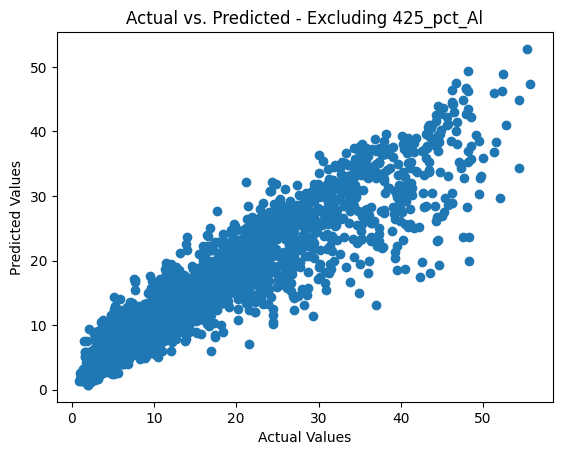

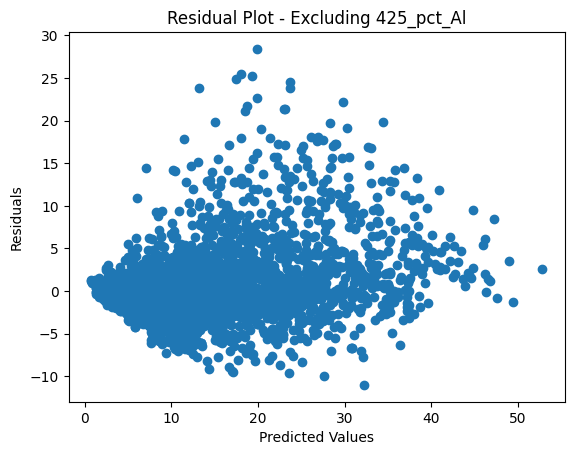

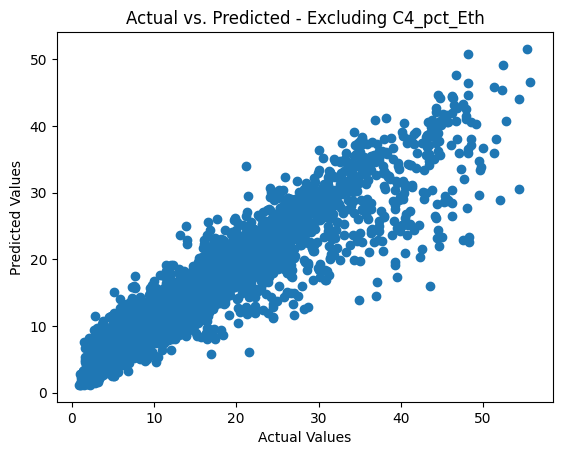

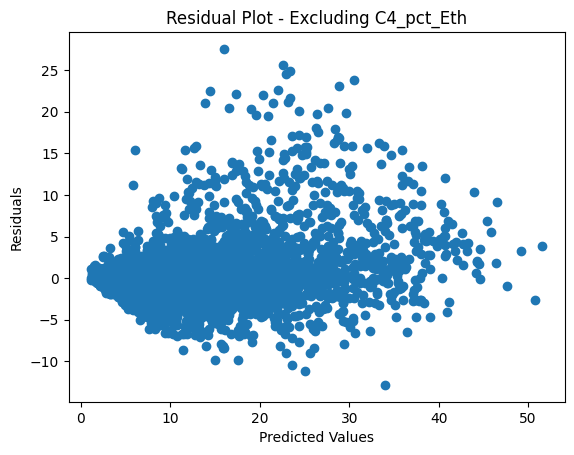

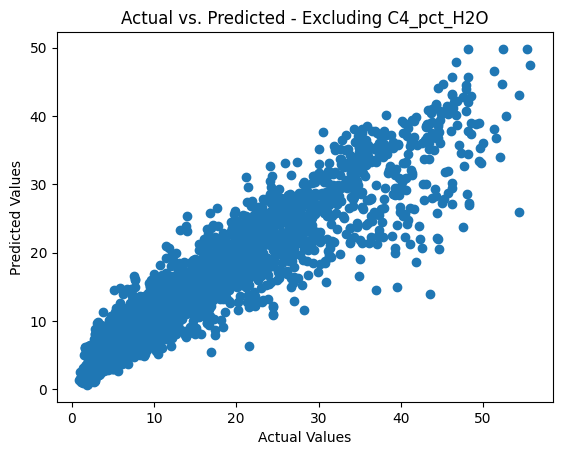

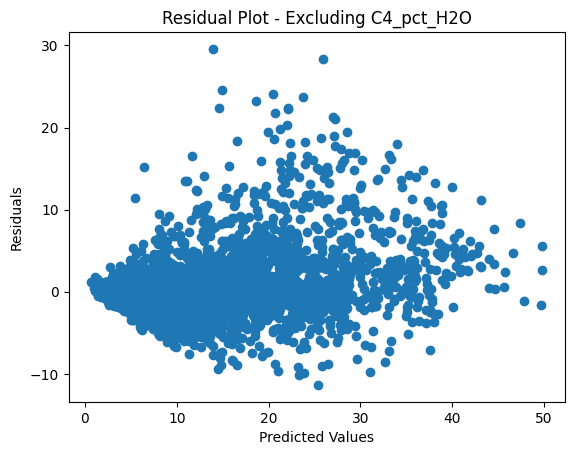

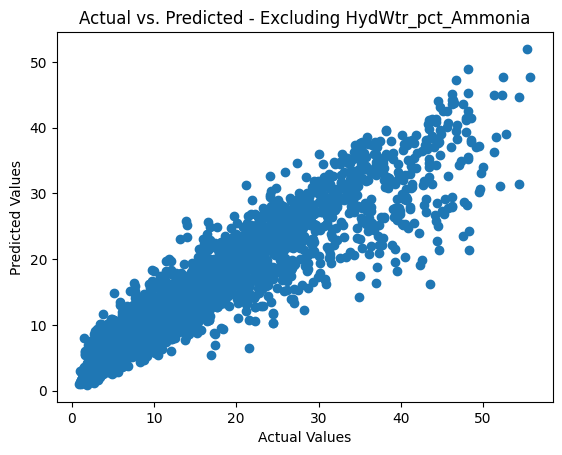

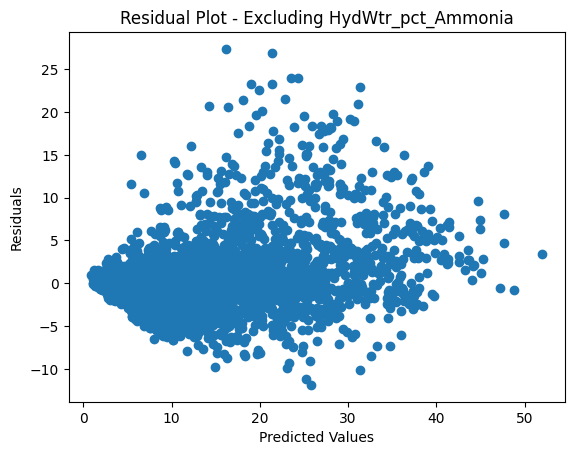

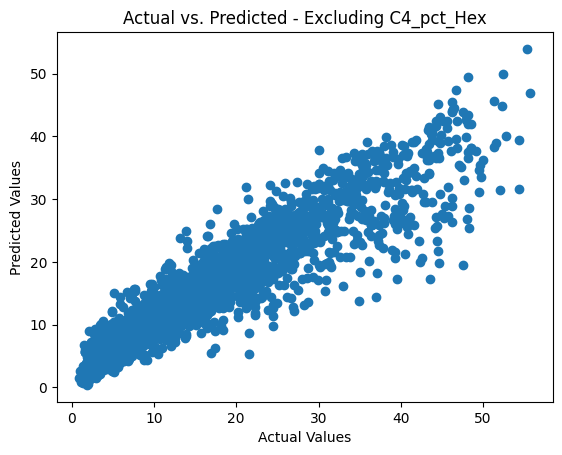

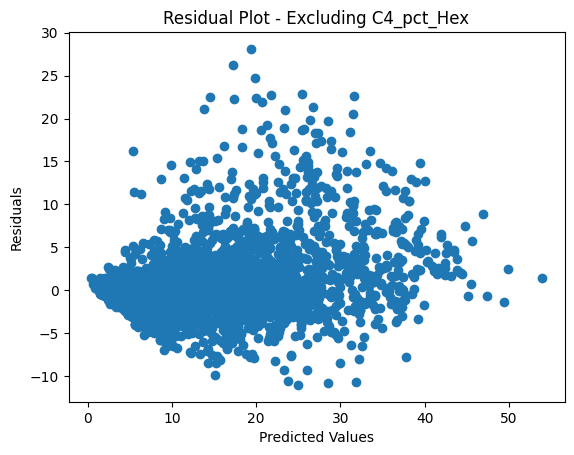

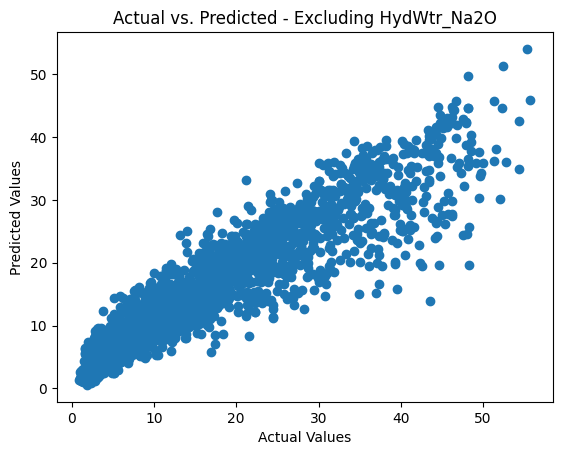

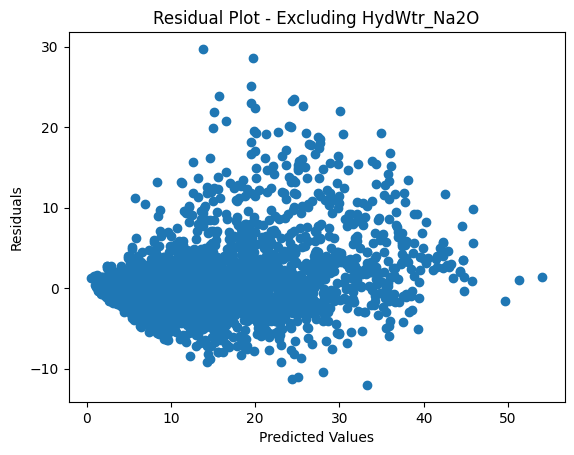

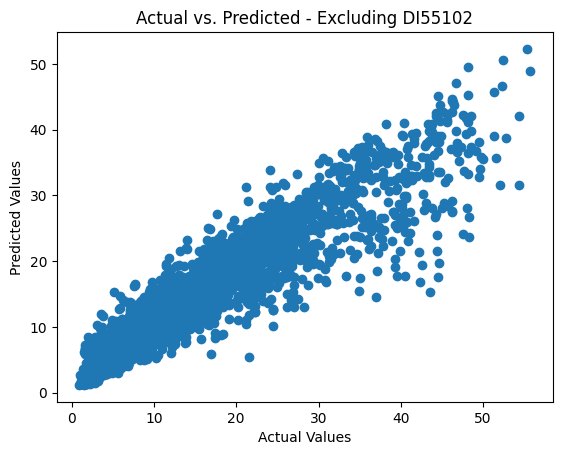

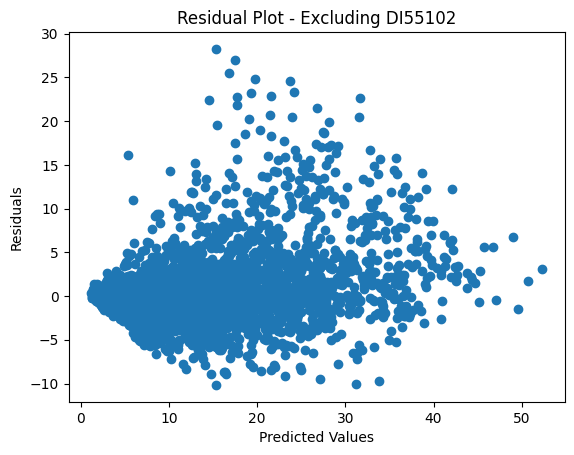

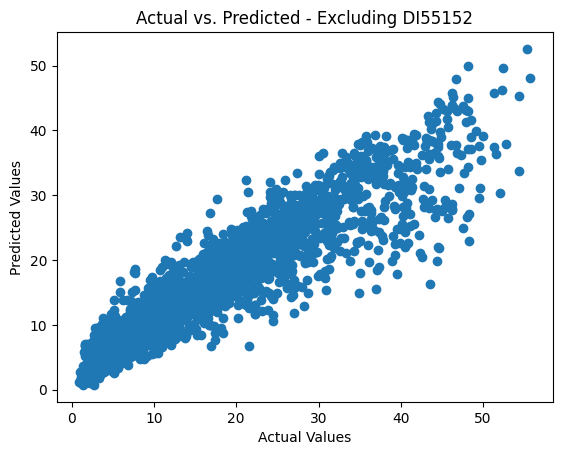

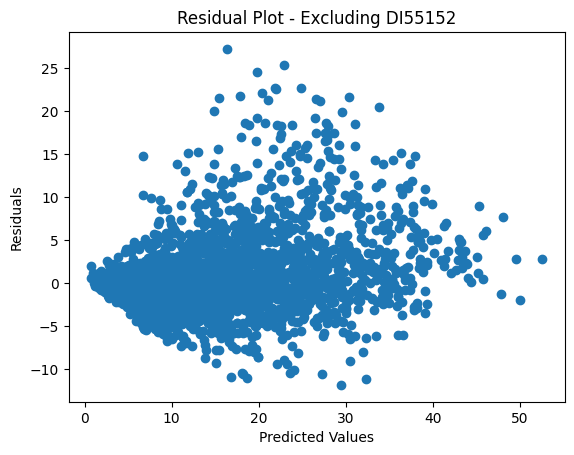

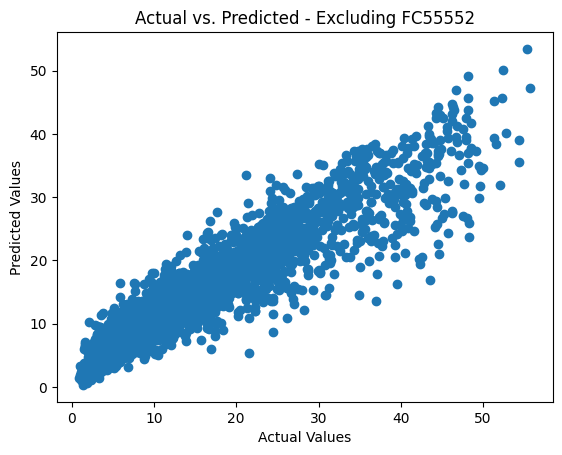

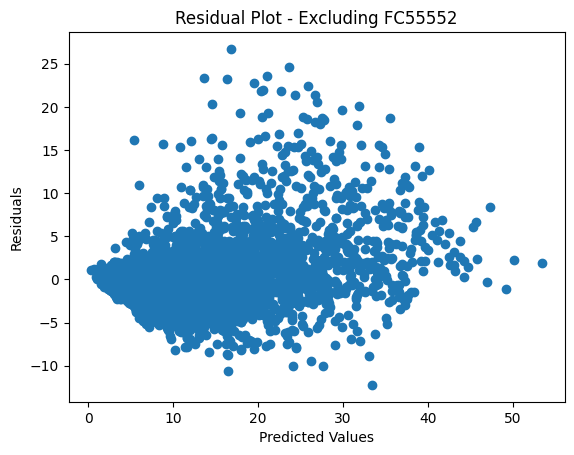

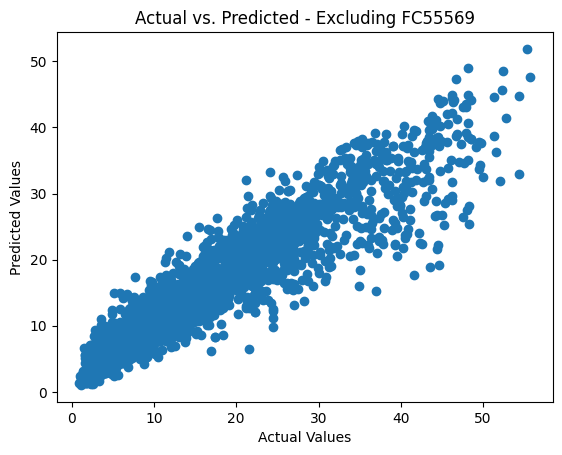

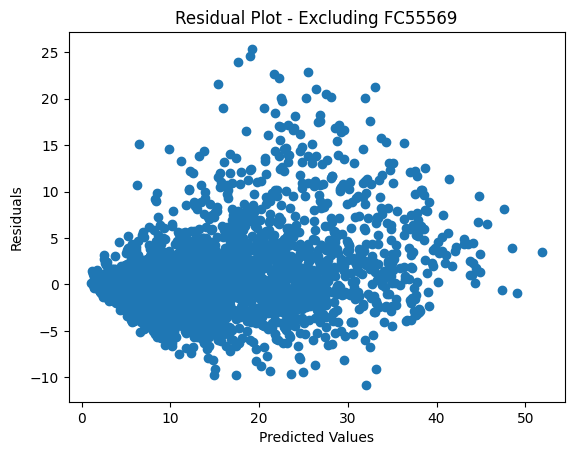

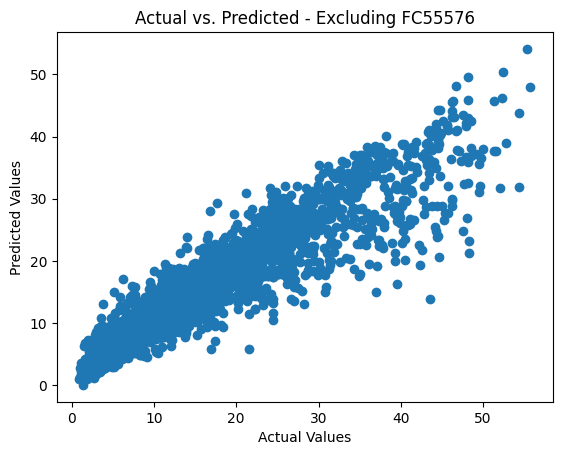

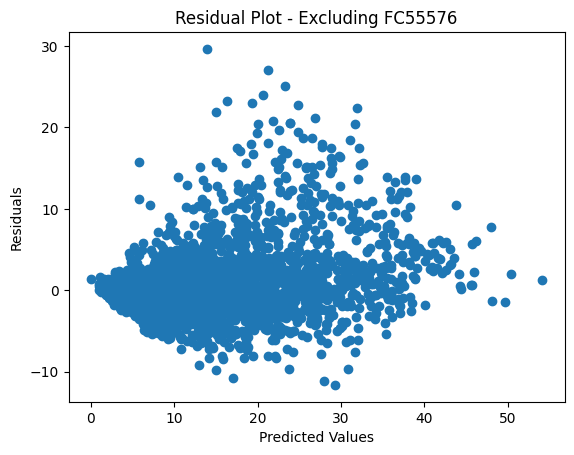

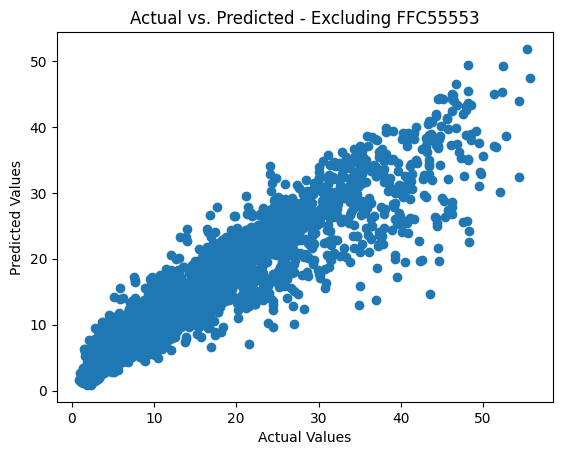

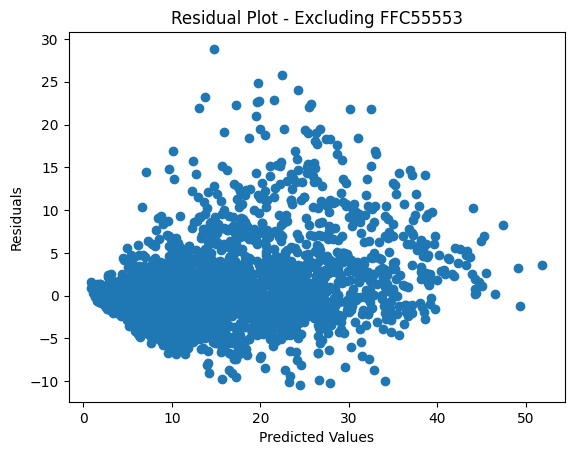

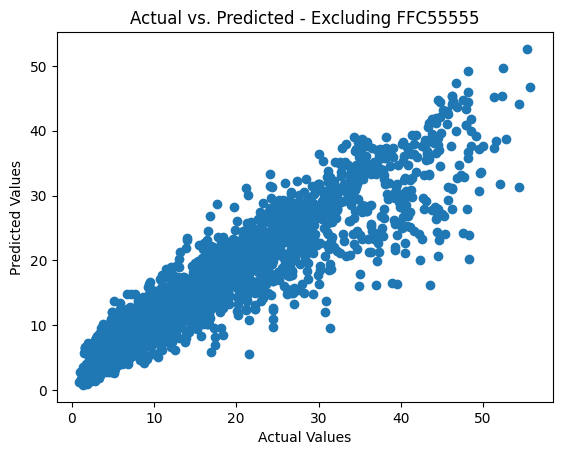

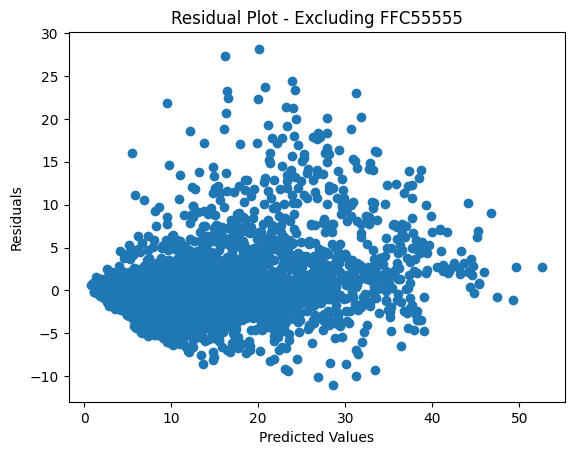

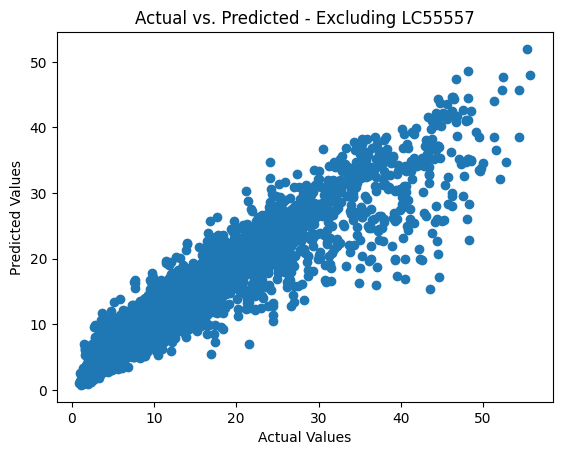

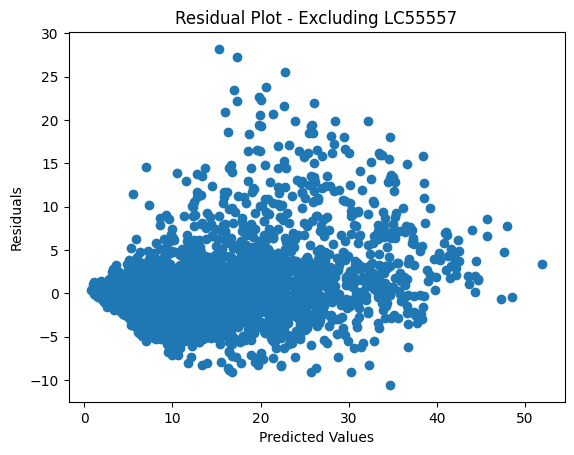

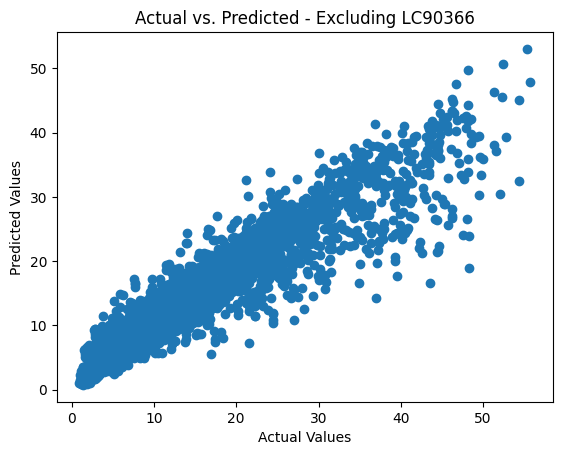

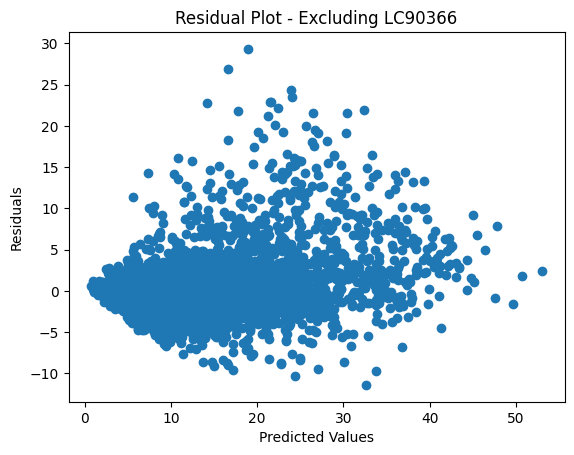

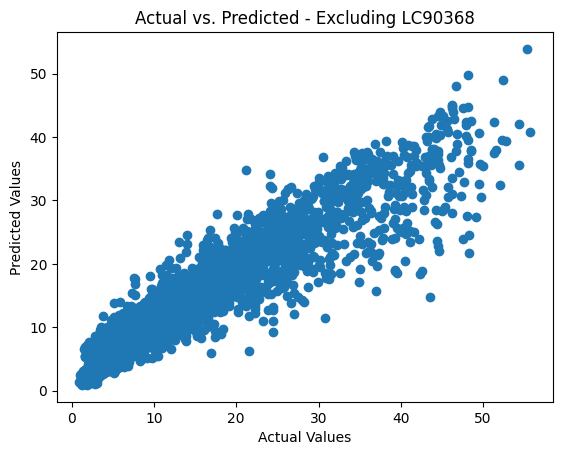

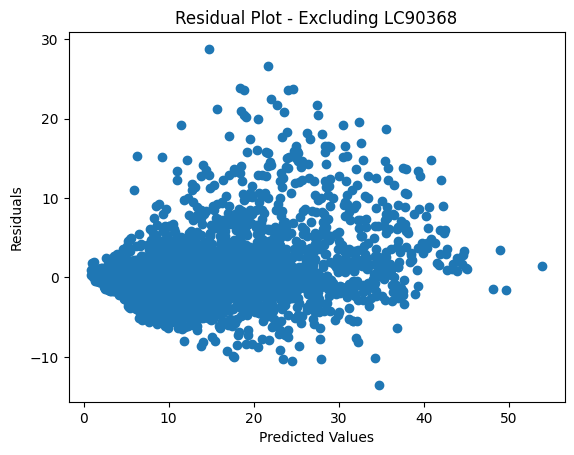

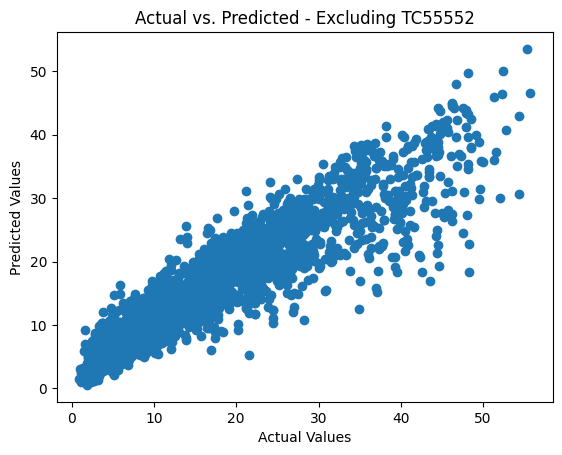

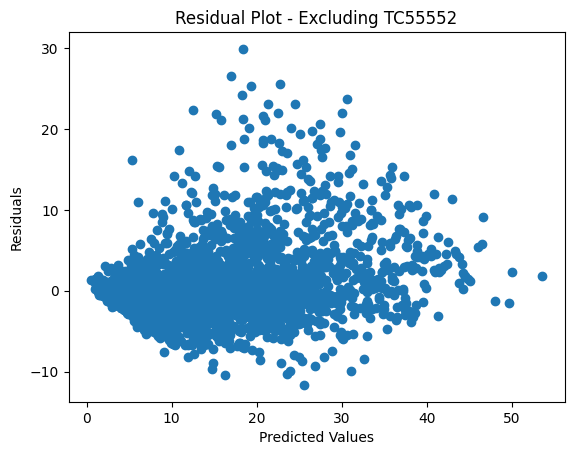

Feature Excluded: 425_pct_Al
MSE Train: 4.576895142570873
RMSE Train: 2.1393679306213023
R2 Train: 0.9415162070535632
MSE Test: 7.703222034112361
RMSE Test: 2.7754678946282842
R2 Test: 0.8994663531954517


Feature Excluded: C4_pct_Eth
MSE Train: 4.585140257541423
RMSE Train: 2.14129406143608
R2 Train: 0.9414108505658708
MSE Test: 7.78337541590497
RMSE Test: 2.7898701431975237
R2 Test: 0.8984202828966021


Feature Excluded: C4_pct_H2O
MSE Train: 4.374829921783842
RMSE Train: 2.0916094094700957
R2 Train: 0.9440982064584145
MSE Test: 7.617296390441479
RMSE Test: 2.759944997720331
R2 Test: 0.9005877564568412


Feature Excluded: HydWtr_pct_Ammonia
MSE Train: 4.785676239670807
RMSE Train: 2.1876188515531694
R2 Train: 0.9388483918483707
MSE Test: 7.890434503078047
RMSE Test: 2.808991723568805
R2 Test: 0.8970230700927373


Feature Excluded: C4_pct_Hex
MSE Train: 4.3235818927199565
RMSE Train: 2.0793224600143088
R2 Train: 0.9447530563134631
MSE Test: 7.572232903532856
RMSE Test: 2.7517690498173

In [10]:

def feature_iteration_model(df, target_column_name, plot_results=False):
    original_features = df.drop(target_column_name, axis=1).columns
    model_performance = {}

    for feature in original_features:
        X = df.drop([target_column_name, feature], axis=1)
        y = df[target_column_name]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        xgb_model = xgb.XGBRegressor(
            objective ='reg:squarederror', 
            learning_rate=0.03,
            n_estimators=600,
            max_depth=7,
            subsample=0.9,
            colsample_bytree=0.8,
            gamma=2.0,
            alpha=0.2,
            reg_lambda=2,
            colsample_bylevel=0.8,
            colsample_bynode=0.7
        )
        xgb_model.fit(X_train, y_train)

        # Predict and evaluate on training data
        y_train_pred = xgb_model.predict(X_train)
        mse_train = mean_squared_error(y_train, y_train_pred)
        rmse_train = np.sqrt(mse_train)
        r2_train = r2_score(y_train, y_train_pred)

        # Predict and evaluate on test data
        y_pred = xgb_model.predict(X_test)
        mse_test = mean_squared_error(y_test, y_pred)
        rmse_test = np.sqrt(mse_test)
        r2_test = r2_score(y_test, y_pred)

        # Store the metrics
        model_performance[feature] = {
            'MSE Train': mse_train,
            'RMSE Train': rmse_train,
            'R2 Train': r2_train,
            'MSE Test': mse_test,
            'RMSE Test': rmse_test,
            'R2 Test': r2_test
        }

        # Plotting (optional)
        if plot_results:
            plt.scatter(y_test, y_pred)
            plt.xlabel('Actual Values')
            plt.ylabel('Predicted Values')
            plt.title(f'Actual vs. Predicted - Excluding {feature}')
            plt.show()

            residuals = y_test - y_pred
            plt.scatter(y_pred, residuals)
            plt.xlabel('Predicted Values')
            plt.ylabel('Residuals')
            plt.title(f'Residual Plot - Excluding {feature}')
            plt.show()

    return model_performance

# Assuming your data is in df_All and you want to predict 'Butanol'
performance_without_each_feature = feature_iteration_model(df_All, 'Butanol', plot_results=True)

# Print or analyze the performance dictionary
for feature, metrics in performance_without_each_feature.items():
    print(f"Feature Excluded: {feature}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print("\n")


In [11]:
# Assuming performance_without_each_feature is your model_performance dictionary
performance_df = pd.DataFrame.from_dict(performance_without_each_feature, orient='index')

print(performance_df) 

                    MSE Train  RMSE Train  R2 Train  MSE Test  RMSE Test  \
425_pct_Al           4.576895    2.139368  0.941516  7.703222   2.775468   
C4_pct_Eth           4.585140    2.141294  0.941411  7.783375   2.789870   
C4_pct_H2O           4.374830    2.091609  0.944098  7.617296   2.759945   
HydWtr_pct_Ammonia   4.785676    2.187619  0.938848  7.890435   2.808992   
C4_pct_Hex           4.323582    2.079322  0.944753  7.572233   2.751769   
HydWtr_Na2O          4.615207    2.148303  0.941027  7.809476   2.794544   
DI55102              4.548252    2.132663  0.941882  7.814684   2.795476   
DI55152              4.585015    2.141265  0.941412  7.841321   2.800236   
FC55552              4.821692    2.195835  0.938388  8.033154   2.834282   
FC55569              4.520872    2.126234  0.942232  7.436392   2.726975   
FC55576              4.450428    2.109604  0.943132  7.624701   2.761286   
FFC55553             4.651859    2.156817  0.940558  7.931613   2.816312   
FFC55555    

In [12]:
performance_df.to_csv('feature_test.csv', index=True)